In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [2]:
data = pd.read_csv(r'C:\Users\Administrator\Downloads\creditcard.csv')

In [3]:
def find_TP(y_true, y_pred):
    return sum((y_true == 1) & (y_pred == 1))


def find_FP(y_true, y_pred):
    return sum((y_true == 0) & (y_pred == 1))


def find_FN(y_true, y_pred):
    return sum((y_true == 1) & (y_pred == 0))


def find_TN(y_true, y_pred):
    return sum((y_true == 0) & (y_pred == 0))


def find_conf_matrix_values(y_true, y_pred):
    TP = find_TP(y_true, y_pred)
    FN = find_FN(y_true, y_pred)
    FP = find_FP(y_true, y_pred)
    TN = find_TN(y_true, y_pred)
    return TP, FN, FP, TN


def my_confusion_matrix(y_true, y_pred):
    TP, FN, FP, TN = find_conf_matrix_values(y_true, y_pred)
    return np.array([[TN, FP], [FN, TP]])


def my_accuracy_score(y_true, y_pred):
    TP, FN, FP, TN = find_conf_matrix_values(y_true, y_pred)
    return (TP + TN) / (TP + FN + FP + TN)


def my_precision_score(y_true, y_pred):
    TP, FN, FP, TN = find_conf_matrix_values(y_true, y_pred)
    return TP / (TP + FP)


def my_recall_score(y_true, y_pred):
    TP, FN, FP, TN = find_conf_matrix_values(y_true, y_pred)
    return TP / (TP + FN)


def my_f1_score(y_true, y_pred):
    recall = my_recall_score(y_true, y_pred)
    precision = my_precision_score(y_true, y_pred)
    return 2 * precision * recall / (precision + recall)

In [4]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [6]:
class_weight_list = []
for i in np.linspace(0.05, 0.95, 10):
    class_weight_list.append({1: i, 0: 1 - i})

In [7]:
auc_score_list = []
f1_score_list = []
precision_score_list = []
recall_score_list = []

In [8]:
for i in range(10):
    clf = tree.DecisionTreeClassifier(class_weight=class_weight_list[i])
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    auc_score_list.append(roc_auc_score(y_test, y_pred))
    f1_score_list.append(my_f1_score(y_test, y_pred))
    precision_score_list.append(my_precision_score(y_test, y_pred))
    recall_score_list.append(my_recall_score(y_test, y_pred))

In [9]:
score_list = [auc_score_list, f1_score_list, precision_score_list, recall_score_list]
label_list = ['auc', 'f1-score', 'precision', 'recall']

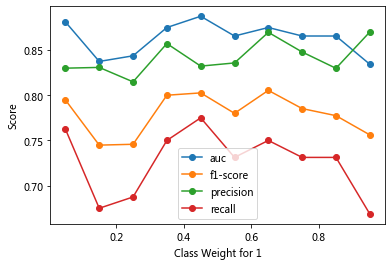

In [10]:
for score, label in zip(score_list, label_list):
    plt.plot(np.linspace(0.05, 0.95, 10), score, label=label, marker='o')
plt.legend()
plt.xlabel('Class Weight for 1')
plt.ylabel('Score')
plt.show()